In [338]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [339]:
fullprevyears = pd.read_csv("data/finaldata/dftouse_withprevyears.csv")

In [340]:
dftouse = fullprevyears.copy(deep=True)

In [341]:
dftouse.shape

(10785, 160)

In [342]:
dftouse.head()

,num_schools,num_charter_schools,num_pub_schools,num_students,pupil_teacher_ratio_dist,pupil_teacher_ratio_ps,totalrev_pp,tlocrev_pp,tsrev_pp,tfedrev_pp,tcurinst_pp,tcurssv_pp,tcuroth_pp,tcursalary_pp,tcurbenefits_pp,totalexp_pp,tcapout_pp,tnonelse_pp,tcurelsc_pp,instexp_pp,tcurelsc_percent,tcurinst_percent,tcuroth_percent,tcuresal_percent,tcurssvc_percent,tfedrev_percent,tlocrev_percent,tsrev_percent,afgr,i_agency_type_local_school_district,i_agency_type_local_school_district_sup_union,i_agency_type_regional_education_services,i_agency_type_charter_school_agency,i_fin_sdlc_sec,i_fin_sdlc_elem_sec,i_fin_sdlc_voc,i_ucl_city_large,i_ucl_city_mid,i_ucl_city_small,i_ucl_suburb_large,i_ucl_suburb_mid,i_ucl_suburb_small,i_ucl_town_fringe,i_ucl_town_distant,i_ucl_town_remote,i_ucl_rural_fringe,i_ucl_rural_distant,i_ucl_rural_remote,i_cs_all_charter,i_cs_charter_noncharter,...,r_lrev_it,r_lrev_aot,r_lrev_pgc,r_lrev_cc,r_lrev_oss,r_lrev_tui,r_lrev_trans,r_lrev_slr,r_lrev_ts,r_lrev_sar,r_lrev_osalserv,r_lrev_sfns,r_lrev_ie,r_lrev_molr,r_lrev_sp,r_lrev_rr,r_lrev_sale,r_lrev_ff,r_lrev_pc,r_srev_gfa,r_srev_sep,r_srev_trans,r_srev_sip,r_srev_cbsp,r_srev_vep,r_srev_codsp,r_srev_bep,r_srev_gt,r_srev_slp,r_srev_aor,r_srev_splea,r_srev_osp,r_srev_ns,r_frev_title1,r_frev_dis,r_frev_cna,r_frev_ems,r_frev_dfs,r_frev_voc,r_frev_ao,r_frev_ns,r_frev_ia,r_frev_be,r_frev_na,r_frev_aofed,RESP_High_Graduation,RESP_Low_Graduation,gradrate0607,gradrate0708,gradrate0809
0,1,1,1,360,15.65,17.14,11111,356,7925,2831,3986,4717,436,4133,1028,11197,1986,72,9139,3986,11.2,43.6,4.8,45.2,51.6,25.5,3.2,71.3,30.2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0.000000,0,0,0.070312,0.390625,0.000000,0,0.062500,0.000000,0.000000,0.000000,0,0.000000,0.078125,0.007812,0.000000,0.390625,0,0.00000,0.964599,0.000000,0.000000,0.000000,0.003155,0.000000,0,0,0.003155,0.000000,0.029092,0.000000,0.000000,0,0.606477,0.000000,0.156035,0.000000,0.000000,0.000000,0.176644,0.060844,0,0,0,0.000000,0,1,NaN,NaN,NaN
1,1,1,1,594,28.49,28.49,10557,10285,273,0,5104,3003,0,4199,1456,8732,554,0,8108,5104,18.0,63.0,0.0,51.8,37.0,0.0,97.4,2.6,100.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0.000000,0,0,0.000000,0.983958,0.005893,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.010149,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.950617,0.000000,0.000000,0,0,0.000000,0.000000,0.049383,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,1,0,100.0,100.0,100.0
2,1,1,1,1033,16.61,16.61,11015,68,9164,1784,4890,3500,441,5788,477,8864,0,1,8832,4890,5.4,55.4,5.0,65.5,39.6,16.2,0.6,83.2,55.7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0.000000,0,0,0.000000,0.000000,0.000000,0,0.800000,0.000000,0.000000,0.000000,0,0.142857,0.000000,0.000000,0.057143,0.000000,0,0.00000,0.952145,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000211,0.006233,0.040038,0.001373,0,0.351058,0.056430,0.238741,0.033641,0.000000,0.000000,0.320130,0.000000,0,0,0,0.000000,0,1,75.6,41.4,NaN
3,3,0,3,432,11.86,12.08,11367,4374,5089,1904,4835,4633,498,5741,2112,13200,2204,0,9966,4835,21.2,48.5,5.0,57.6,46.5,16.7,38.5,44.8,70.7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0.000000,0,0,0.000000,0.001049,0.000000,0,0.060829,0.009963,0.014683,0.000000,0,0.005244,0.052438,0.027792,0.004195,0.000000,0,0.02517,0.642181,0.049572,0.068049,0.000000,0.004056,0.000901,0,0,0.000000,0.000901,0.015773,0.218567,0.000000,0,0.162651,0.306024,0.087952,0.038554,0.002410,0.000000,0.402410,0.000000,0,0,0,0.000000,0,1,97.1,81.6,83.3
4,2,0,2,595,15.64,13.37,10718,5634,4020,1065,4944,2103,336,4703,1438,11586,2769,0,7384,4944,19.5,67.0,4.6,63.7,28.5,9.9,52.6,37.5,95.7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0.061464,0,0,0.000000,0.043101,0.000000,0,0.034175,0.008926,0.004336,0.002805,0,0.004081,0.066820,0.000000,0.000000,0.004081,0,0.00000,0.859543,0.000000,0.000000,0.118656,0.000000,0.002144,0,0,0.000000,0.001072,0.018585,0.000000,0.000000,0,0.095816,0.107962,0.1

In [343]:
STANDARDIZABLE = ['num_students', 'num_schools','num_charter_schools','num_pub_schools','tcuresal_percent','pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp','tlocrev_pp','tsrev_pp','tfedrev_pp','tcurinst_pp','tcurssv_pp','tcuroth_pp','tcursalary_pp','tcurbenefits_pp','totalexp_pp','tcapout_pp','tnonelse_pp','tcurelsc_pp','instexp_pp','tcurinst_percent','tcuroth_percent','tcurelsc_percent','tcurssvc_percent','tfedrev_percent','tlocrev_percent','tsrev_percent','r_ELL','r_IEP','r_lunch_free','r_lunch_reduced','r_stud_PKK','r_stud_18','r_stud_912','r_stud_re_M','r_stud_re_F','r_stud_re_AIAN','r_stud_re_AAP','r_stud_re_H','r_stud_re_B','r_stud_re_W','r_stud_re_HNPI','r_stud_re_Two','r_stud_re_Total','r_stud_reg_12_AIAN_M','r_stud_reg_12_AIAN_F','r_stud_reg_12_AAP_M','r_stud_reg_12_AAP_F','r_stud_reg_12_H_M','r_stud_reg_12_H_F','r_stud_reg_12_B_M','r_stud_reg_12_B_F','r_stud_reg_12_W_M','r_stud_reg_12_W_F','r_stud_reg_12_HNPI_M','r_stud_reg_12_HNPI_F','r_stud_reg_12_Two_M','r_stud_reg_12_Two_F','r_st_PKT','r_st_KT','r_st_ET','r_st_ST','r_st_UT','r_st_TS','r_st_IA','r_st_IC','r_st_EGC','r_st_SGC','r_st_OGC','r_st_TGC','r_st_LMS','r_st_LMSS','r_st_LEA','r_st_LEASS','r_st_SA','r_st_SASS','r_st_SSSS','r_st_OSSS','r_lrev_pt','r_lrev_gst','r_lrev_put','r_lrev_it','r_lrev_aot','r_lrev_pgc','r_lrev_cc','r_lrev_oss','r_lrev_tui','r_lrev_trans','r_lrev_slr','r_lrev_ts','r_lrev_sar','r_lrev_osalserv','r_lrev_sfns','r_lrev_ie','r_lrev_molr','r_lrev_sp','r_lrev_rr','r_lrev_sale','r_lrev_ff','r_lrev_pc','r_srev_gfa','r_srev_sep','r_srev_trans','r_srev_sip','r_srev_cbsp','r_srev_vep','r_srev_codsp','r_srev_bep','r_srev_gt','r_srev_slp','r_srev_aor','r_srev_splea','r_srev_osp','r_srev_ns','r_frev_title1','r_frev_dis','r_frev_cna','r_frev_ems','r_frev_dfs','r_frev_voc','r_frev_ao','r_frev_ns','r_frev_ia','r_frev_be','r_frev_na','r_frev_aofed']
print STANDARDIZABLE

['num_students', 'num_schools', 'num_charter_schools', 'num_pub_schools', 'tcuresal_percent', 'pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp', 'tlocrev_pp', 'tsrev_pp', 'tfedrev_pp', 'tcurinst_pp', 'tcurssv_pp', 'tcuroth_pp', 'tcursalary_pp', 'tcurbenefits_pp', 'totalexp_pp', 'tcapout_pp', 'tnonelse_pp', 'tcurelsc_pp', 'instexp_pp', 'tcurinst_percent', 'tcuroth_percent', 'tcurelsc_percent', 'tcurssvc_percent', 'tfedrev_percent', 'tlocrev_percent', 'tsrev_percent', 'r_ELL', 'r_IEP', 'r_lunch_free', 'r_lunch_reduced', 'r_stud_PKK', 'r_stud_18', 'r_stud_912', 'r_stud_re_M', 'r_stud_re_F', 'r_stud_re_AIAN', 'r_stud_re_AAP', 'r_stud_re_H', 'r_stud_re_B', 'r_stud_re_W', 'r_stud_re_HNPI', 'r_stud_re_Two', 'r_stud_re_Total', 'r_stud_reg_12_AIAN_M', 'r_stud_reg_12_AIAN_F', 'r_stud_reg_12_AAP_M', 'r_stud_reg_12_AAP_F', 'r_stud_reg_12_H_M', 'r_stud_reg_12_H_F', 'r_stud_reg_12_B_M', 'r_stud_reg_12_B_F', 'r_stud_reg_12_W_M', 'r_stud_reg_12_W_F', 'r_stud_reg_12_HNPI_M', 'r_stud_r

In [344]:
INDICATORS = []
for v in dftouse.columns:
    l=np.unique(dftouse[v])
    if len(l) <= 10:
        INDICATORS.append(v)
        
INDICATORS.remove('RESP_High_Graduation')        
INDICATORS.remove('RESP_Low_Graduation')  
print INDICATORS

['i_agency_type_local_school_district', 'i_agency_type_local_school_district_sup_union', 'i_agency_type_regional_education_services', 'i_agency_type_charter_school_agency', 'i_fin_sdlc_sec', 'i_fin_sdlc_elem_sec', 'i_fin_sdlc_voc', 'i_ucl_city_large', 'i_ucl_city_mid', 'i_ucl_city_small', 'i_ucl_suburb_large', 'i_ucl_suburb_mid', 'i_ucl_suburb_small', 'i_ucl_town_fringe', 'i_ucl_town_distant', 'i_ucl_town_remote', 'i_ucl_rural_fringe', 'i_ucl_rural_distant', 'i_ucl_rural_remote', 'i_cs_all_charter', 'i_cs_charter_noncharter', 'i_cs_all_noncharter', 'i_ma_ne_nr', 'i_ma_metropolitan', 'i_ma_micropolitan', 'i_lgo_K', 'i_lgo_PK']


In [345]:
#CITATION: From HW3
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [346]:
#CITATION: From HW3
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [347]:
# make sure we didn't get unlucky in our mask selection
print "% Graduation in Training:", np.mean(dftouse['afgr'][mask])
print "% Graduation in Testing:", np.mean(dftouse['afgr'][~mask])

% Graduation in Training: 82.6267585111
% Graduation in Testing: 82.8446538937


In [348]:
#CITATION: From HW3
mask

array([ True,  True, False, ...,  True,  True,  True], dtype=bool)

In [349]:
#CITATION: From HW3
mask.shape, mask.sum()

((10785,), 7549)

In [350]:
dftouse.head()

,num_schools,num_charter_schools,num_pub_schools,num_students,pupil_teacher_ratio_dist,pupil_teacher_ratio_ps,totalrev_pp,tlocrev_pp,tsrev_pp,tfedrev_pp,tcurinst_pp,tcurssv_pp,tcuroth_pp,tcursalary_pp,tcurbenefits_pp,totalexp_pp,tcapout_pp,tnonelse_pp,tcurelsc_pp,instexp_pp,tcurelsc_percent,tcurinst_percent,tcuroth_percent,tcuresal_percent,tcurssvc_percent,tfedrev_percent,tlocrev_percent,tsrev_percent,afgr,i_agency_type_local_school_district,i_agency_type_local_school_district_sup_union,i_agency_type_regional_education_services,i_agency_type_charter_school_agency,i_fin_sdlc_sec,i_fin_sdlc_elem_sec,i_fin_sdlc_voc,i_ucl_city_large,i_ucl_city_mid,i_ucl_city_small,i_ucl_suburb_large,i_ucl_suburb_mid,i_ucl_suburb_small,i_ucl_town_fringe,i_ucl_town_distant,i_ucl_town_remote,i_ucl_rural_fringe,i_ucl_rural_distant,i_ucl_rural_remote,i_cs_all_charter,i_cs_charter_noncharter,...,r_lrev_it,r_lrev_aot,r_lrev_pgc,r_lrev_cc,r_lrev_oss,r_lrev_tui,r_lrev_trans,r_lrev_slr,r_lrev_ts,r_lrev_sar,r_lrev_osalserv,r_lrev_sfns,r_lrev_ie,r_lrev_molr,r_lrev_sp,r_lrev_rr,r_lrev_sale,r_lrev_ff,r_lrev_pc,r_srev_gfa,r_srev_sep,r_srev_trans,r_srev_sip,r_srev_cbsp,r_srev_vep,r_srev_codsp,r_srev_bep,r_srev_gt,r_srev_slp,r_srev_aor,r_srev_splea,r_srev_osp,r_srev_ns,r_frev_title1,r_frev_dis,r_frev_cna,r_frev_ems,r_frev_dfs,r_frev_voc,r_frev_ao,r_frev_ns,r_frev_ia,r_frev_be,r_frev_na,r_frev_aofed,RESP_High_Graduation,RESP_Low_Graduation,gradrate0607,gradrate0708,gradrate0809
0,1,1,1,360,15.65,17.14,11111,356,7925,2831,3986,4717,436,4133,1028,11197,1986,72,9139,3986,11.2,43.6,4.8,45.2,51.6,25.5,3.2,71.3,30.2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0.000000,0,0,0.070312,0.390625,0.000000,0,0.062500,0.000000,0.000000,0.000000,0,0.000000,0.078125,0.007812,0.000000,0.390625,0,0.00000,0.964599,0.000000,0.000000,0.000000,0.003155,0.000000,0,0,0.003155,0.000000,0.029092,0.000000,0.000000,0,0.606477,0.000000,0.156035,0.000000,0.000000,0.000000,0.176644,0.060844,0,0,0,0.000000,0,1,NaN,NaN,NaN
1,1,1,1,594,28.49,28.49,10557,10285,273,0,5104,3003,0,4199,1456,8732,554,0,8108,5104,18.0,63.0,0.0,51.8,37.0,0.0,97.4,2.6,100.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0.000000,0,0,0.000000,0.983958,0.005893,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.010149,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.950617,0.000000,0.000000,0,0,0.000000,0.000000,0.049383,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,1,0,100.0,100.0,100.0
2,1,1,1,1033,16.61,16.61,11015,68,9164,1784,4890,3500,441,5788,477,8864,0,1,8832,4890,5.4,55.4,5.0,65.5,39.6,16.2,0.6,83.2,55.7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0.000000,0,0,0.000000,0.000000,0.000000,0,0.800000,0.000000,0.000000,0.000000,0,0.142857,0.000000,0.000000,0.057143,0.000000,0,0.00000,0.952145,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000211,0.006233,0.040038,0.001373,0,0.351058,0.056430,0.238741,0.033641,0.000000,0.000000,0.320130,0.000000,0,0,0,0.000000,0,1,75.6,41.4,NaN
3,3,0,3,432,11.86,12.08,11367,4374,5089,1904,4835,4633,498,5741,2112,13200,2204,0,9966,4835,21.2,48.5,5.0,57.6,46.5,16.7,38.5,44.8,70.7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0.000000,0,0,0.000000,0.001049,0.000000,0,0.060829,0.009963,0.014683,0.000000,0,0.005244,0.052438,0.027792,0.004195,0.000000,0,0.02517,0.642181,0.049572,0.068049,0.000000,0.004056,0.000901,0,0,0.000000,0.000901,0.015773,0.218567,0.000000,0,0.162651,0.306024,0.087952,0.038554,0.002410,0.000000,0.402410,0.000000,0,0,0,0.000000,0,1,97.1,81.6,83.3
4,2,0,2,595,15.64,13.37,10718,5634,4020,1065,4944,2103,336,4703,1438,11586,2769,0,7384,4944,19.5,67.0,4.6,63.7,28.5,9.9,52.6,37.5,95.7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0.061464,0,0,0.000000,0.043101,0.000000,0,0.034175,0.008926,0.004336,0.002805,0,0.004081,0.066820,0.000000,0.000000,0.004081,0,0.00000,0.859543,0.000000,0.000000,0.118656,0.000000,0.002144,0,0,0.000000,0.001072,0.018585,0.000000,0.000000,0,0.095816,0.107962,0.1

In [351]:
#CITATION: From HW3
from sklearn.preprocessing import StandardScaler

for col in STANDARDIZABLE:
    #print col
    valstrain=dftouse[col].values[mask]
    valstest=dftouse[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    dftouse[col]=out

In [352]:
dftouse.head()

,num_schools,num_charter_schools,num_pub_schools,num_students,pupil_teacher_ratio_dist,pupil_teacher_ratio_ps,totalrev_pp,tlocrev_pp,tsrev_pp,tfedrev_pp,tcurinst_pp,tcurssv_pp,tcuroth_pp,tcursalary_pp,tcurbenefits_pp,totalexp_pp,tcapout_pp,tnonelse_pp,tcurelsc_pp,instexp_pp,tcurelsc_percent,tcurinst_percent,tcuroth_percent,tcuresal_percent,tcurssvc_percent,tfedrev_percent,tlocrev_percent,tsrev_percent,afgr,i_agency_type_local_school_district,i_agency_type_local_school_district_sup_union,i_agency_type_regional_education_services,i_agency_type_charter_school_agency,i_fin_sdlc_sec,i_fin_sdlc_elem_sec,i_fin_sdlc_voc,i_ucl_city_large,i_ucl_city_mid,i_ucl_city_small,i_ucl_suburb_large,i_ucl_suburb_mid,i_ucl_suburb_small,i_ucl_town_fringe,i_ucl_town_distant,i_ucl_town_remote,i_ucl_rural_fringe,i_ucl_rural_distant,i_ucl_rural_remote,i_cs_all_charter,i_cs_charter_noncharter,...,r_lrev_it,r_lrev_aot,r_lrev_pgc,r_lrev_cc,r_lrev_oss,r_lrev_tui,r_lrev_trans,r_lrev_slr,r_lrev_ts,r_lrev_sar,r_lrev_osalserv,r_lrev_sfns,r_lrev_ie,r_lrev_molr,r_lrev_sp,r_lrev_rr,r_lrev_sale,r_lrev_ff,r_lrev_pc,r_srev_gfa,r_srev_sep,r_srev_trans,r_srev_sip,r_srev_cbsp,r_srev_vep,r_srev_codsp,r_srev_bep,r_srev_gt,r_srev_slp,r_srev_aor,r_srev_splea,r_srev_osp,r_srev_ns,r_frev_title1,r_frev_dis,r_frev_cna,r_frev_ems,r_frev_dfs,r_frev_voc,r_frev_ao,r_frev_ns,r_frev_ia,r_frev_be,r_frev_na,r_frev_aofed,RESP_High_Graduation,RESP_Low_Graduation,gradrate0607,gradrate0708,gradrate0809
0,-0.405638,0.497204,-0.406686,-0.322194,0.323161,0.623438,-0.230160,-1.004203,0.524713,0.508421,-0.918126,0.341165,-0.130127,-0.760750,-0.910297,-0.225541,0.210726,-0.076905,-0.346334,-0.918126,-1.419632,-1.984907,0.149096,-1.457937,2.628442,1.748674,-1.808380,1.367714,30.2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,-0.254387,-0.257967,-0.262693,0.344938,3.285146,-0.225287,-0.061371,0.475060,-0.287592,-0.514576,-0.248744,-0.076603,-0.391273,0.268688,-0.154560,-0.185204,20.016260,-0.277192,-0.200936,1.013881,-0.598738,-0.463813,-0.277536,-0.284196,-0.290191,-0.307652,-0.087252,0.907578,-0.398417,-0.426473,-0.467730,-0.257444,-0.166414,3.227526,-1.025454,-0.227660,-0.805051,-0.275497,-0.284400,-0.587330,0.100907,-0.211283,-0.170977,-0.168519,-0.427667,0,1,NaN,NaN,NaN
1,-0.405638,0.497204,-0.406686,-0.301388,3.020676,3.193607,-0.299876,0.949654,-1.457921,-0.643055,-0.514612,-0.353427,-1.984648,-0.738879,-0.583775,-0.519345,-0.220280,-0.186717,-0.552430,-0.514612,-0.301963,0.395530,-2.332196,-0.747132,0.357003,-1.624825,2.844115,-2.482729,100.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,-0.254387,-0.257967,-0.262693,-0.335964,8.881098,0.100949,-0.061371,-0.918149,-0.287592,-0.514576,-0.248744,-0.076603,-0.391273,-0.384325,-0.233941,-0.185204,-0.109973,-0.277192,-0.200936,-3.129817,-0.598738,-0.463813,16.540081,-0.392231,-0.290191,-0.307652,-0.087252,-0.185639,-0.398417,-0.273602,-0.467730,-0.257444,-0.166414,-1.662809,-1.025454,-2.056850,-0.805051,-0.275497,-0.284400,-1.405727,-0.400721,-0.211283,-0.170977,-0.168519,-0.427667,1,0,100.0,100.0,100.0
2,-0.303787,0.204206,-0.302537,-0.193176,0.625223,0.486833,-0.243805,-1.121311,0.812778,0.120566,-0.567304,-0.136176,-0.107360,-0.192784,-1.287739,-0.538151,-0.502067,-0.166726,-0.384202,-0.567304,-2.305034,-0.514879,0.262457,0.695881,0.808453,0.523524,-1.919020,1.991286,55.7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,-0.259399,-0.252307,-0.252842,-0.333618,-0.386800,-0.210588,-0.126559,14.820066,-0.264196,-0.518918,-0.229135,-0.058053,3.269319,-0.483020,-0.252760,2.560507,-0.138059,-0.244768,-0.196822,0.968177,-0.612405,-0.517624,-0.259611,-0.426136,-0.273077,-0.327845,-0.123013,-0.174159,-0.333431,-0.613574,-0.038365,-0.118678,-0.159317,1.161054,-0.674922,0.760543,0.319382,-0.248484,-0.232440,0.045126,-0.407163,-0.207558,-0.168722,-0.196916,-0.429082,0,1,75.6,41.4,NaN
3,-0.221371,-0.083855,-0.221372,-0.227951,-0.563919,-0.542928,-0.195400,-0.204932,-0.204229,0.180764,-0.586393,0.324494,0.157670,-0.207665,-0.059056,0.035950,0.373915,-0.16806

In [353]:
#CITATION: From HW3
lcols=list(dftouse.columns)
lcols.remove('RESP_High_Graduation')
lcols.remove('RESP_Low_Graduation')
lcols.remove('afgr')
lcols.remove('gradrate0607')
lcols.remove('gradrate0708')
lcols.remove('gradrate0809')
###Check for Index Column if exixts in data and remove.
indexcol='Unnamed: 0'
if indexcol in list(dftouse.columns): lcols.remove(indexcol)
print len(lcols)

154


In [354]:
#CITATION: From HW3
ccols=[]
for c in lcols:
    if c not in INDICATORS:
        ccols.append(c)
print len(ccols), len(INDICATORS)
ccols

127 27


['num_schools',
 'num_charter_schools',
 'num_pub_schools',
 'num_students',
 'pupil_teacher_ratio_dist',
 'pupil_teacher_ratio_ps',
 'totalrev_pp',
 'tlocrev_pp',
 'tsrev_pp',
 'tfedrev_pp',
 'tcurinst_pp',
 'tcurssv_pp',
 'tcuroth_pp',
 'tcursalary_pp',
 'tcurbenefits_pp',
 'totalexp_pp',
 'tcapout_pp',
 'tnonelse_pp',
 'tcurelsc_pp',
 'instexp_pp',
 'tcurelsc_percent',
 'tcurinst_percent',
 'tcuroth_percent',
 'tcuresal_percent',
 'tcurssvc_percent',
 'tfedrev_percent',
 'tlocrev_percent',
 'tsrev_percent',
 'r_ELL',
 'r_IEP',
 'r_lunch_free',
 'r_lunch_reduced',
 'r_stud_PKK',
 'r_stud_18',
 'r_stud_912',
 'r_stud_re_M',
 'r_stud_re_F',
 'r_stud_re_AIAN',
 'r_stud_re_AAP',
 'r_stud_re_H',
 'r_stud_re_B',
 'r_stud_re_W',
 'r_stud_re_HNPI',
 'r_stud_re_Two',
 'r_stud_re_Total',
 'r_stud_reg_12_AIAN_M',
 'r_stud_reg_12_AIAN_F',
 'r_stud_reg_12_AAP_M',
 'r_stud_reg_12_AAP_F',
 'r_stud_reg_12_H_M',
 'r_stud_reg_12_H_F',
 'r_stud_reg_12_B_M',
 'r_stud_reg_12_B_F',
 'r_stud_reg_12_W_M',
 

In [355]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['afgr'].values

In [356]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

##### Linear Regression

In [559]:
import sklearn.linear_model
lm = linear_model.LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [364]:
print lm.intercept_
print lm.coef_

2284492.55126
[  9.82730034e+00   7.38868382e-01  -1.27922470e+01   2.29332530e+00
  -3.23730226e-01   1.92130751e-01  -1.16009746e+03   7.42901729e+02
   5.63493081e+02   3.59244519e+02   3.08949928e+06   3.30708963e+02
   3.17176293e+01  -1.11507854e+00  -1.69187488e+00  -3.59567234e+00
   1.50364100e+00   1.20397426e-01  -6.65411031e+02  -3.08912883e+06
   1.68125640e-01   3.58739902e+00   8.29128117e-01   6.08156256e-01
   1.81519998e+00  -6.81051223e+00  -1.42647838e+01  -1.36236292e+01
   4.20312976e+00   4.07948553e-01  -2.20532370e+00   1.16896447e+06
   1.99904958e+01   2.10301573e+01   2.24242387e+01  -9.78778775e+05
  -9.78777886e+05  -9.78779188e+05  -9.78777060e+05  -9.78777038e+05
  -9.78776433e+05  -9.78776084e+05  -9.78777742e+05  -9.78777652e+05
  -9.78776969e+05  -9.78776968e+05  -9.78776313e+05  -2.39211156e+06
  -1.22314644e+06  -1.22314411e+06  -8.25241132e+04  -8.25244642e+04
  -8.25247177e+04   1.13759696e+01   1.12510865e+01  -1.57340325e-01
  -5.28257801e-01  -

<b>Top Factors - Positive</b>

In [370]:
pd.DataFrame(zip(dftouse[lcols].columns, lm.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=False)[:25]

,features,estimatedCoefficients
68,r_stud_re_W,1.055197e+11
66,r_stud_re_H,7.215974e+10
67,r_stud_re_B,6.937456e+10
97,r_st_TGC,6.650030e+10
64,r_stud_re_AIAN,4.050347e+10
65,r_stud_re_AAP,1.574396e+10
70,r_stud_re_Two,8.551185e+09
69,r_stud_re_HNPI,8.612744e+08
10,tcurinst_pp,3.089499e+06
31,i_agency_type_charter_school_agency,1.168964e+06


<b>Top Factors - Negative</b>

In [372]:
pd.DataFrame(zip(dftouse[lcols].columns, lm.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=True)[:25]

,features,estimatedCoefficients
95,r_st_SGC,-5.125104e+10
96,r_st_OGC,-4.956275e+10
94,r_st_EGC,-3.271217e+10
71,r_stud_re_Total,-2.165220e+10
19,instexp_pp,-3.089129e+06
47,i_cs_all_charter,-2.392112e+06
48,i_cs_charter_noncharter,-1.223146e+06
49,i_cs_all_noncharter,-1.223144e+06
37,i_ucl_city_small,-9.787792e+05
35,i_ucl_city_large,-9.787788e+05


r2

In [373]:
from sklearn import cross_validation
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.32246531, -3.11217975,  0.35732361])

Mean Squared Error

In [374]:
from sklearn.metrics import mean_squared_error
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

2.486200447507152e+21

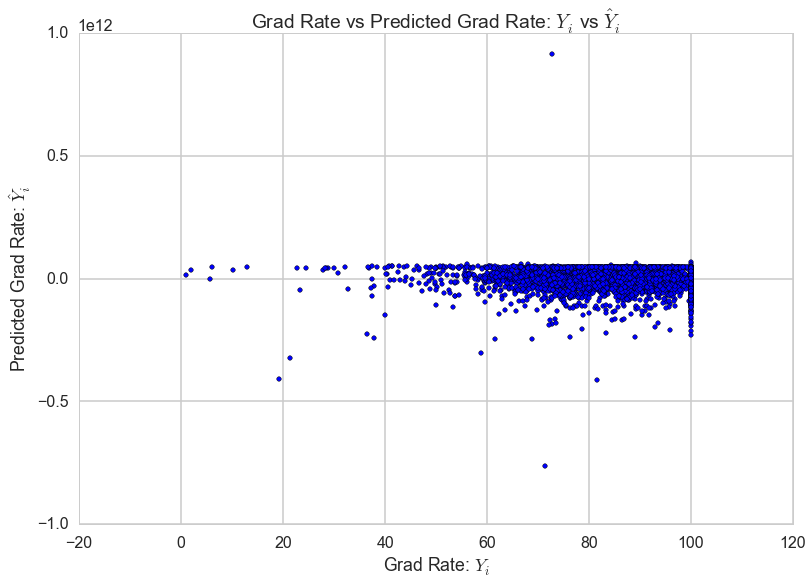

In [379]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Lasso Regression

In [380]:
lasso = linear_model.Lasso()

In [381]:
lasso.fit(Xtrain, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [382]:
print lasso.coef_
print lasso.intercept_

[-0.         -0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.43044542 -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.         -0.
  0.          0.          0.13638314 -0.         -0.          1.25069565
 -0.          0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -2.57726691  0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.         -1.52681302
  0.         -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          1.22288817
  1.81900633 -0.          0.          0.          0.         -0.          0.
 -0.       

In [391]:
pd.DataFrame(zip(dftouse[lcols].columns, lasso.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=False)[:10]

,features,estimatedCoefficients
81,r_stud_reg_12_W_F,1.819006
26,tlocrev_percent,1.250696
80,r_stud_reg_12_W_M,1.222888
106,r_lrev_pt,0.370702
23,tcuresal_percent,0.136383
0,num_schools,-0.000000
101,r_st_LEASS,-0.000000
102,r_st_SA,-0.000000
103,r_st_SASS,-0.000000
104,r_st_SSSS,-0.000000


In [390]:
pd.DataFrame(zip(dftouse[lcols].columns, lasso.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=True)[:10]

,features,estimatedCoefficients
57,r_lunch_free,-2.577267
67,r_stud_re_B,-1.526813
9,tfedrev_pp,-0.430445
122,r_lrev_molr,-0.007719
110,r_lrev_aot,0.000000
109,r_lrev_it,0.000000
108,r_lrev_put,0.000000
112,r_lrev_cc,-0.000000
107,r_lrev_gst,-0.000000
98,r_st_LMS,0.000000


r2

In [392]:
from sklearn import cross_validation
cross_validation.cross_val_score(lasso, Xtrain, ytrain, scoring='r2')

array([ 0.28701061,  0.29738752,  0.28287031])

Mean Squared Error

In [393]:
yp = lasso.predict(Xtest)
mean_squared_error(yp, ytest)

127.84533963111164

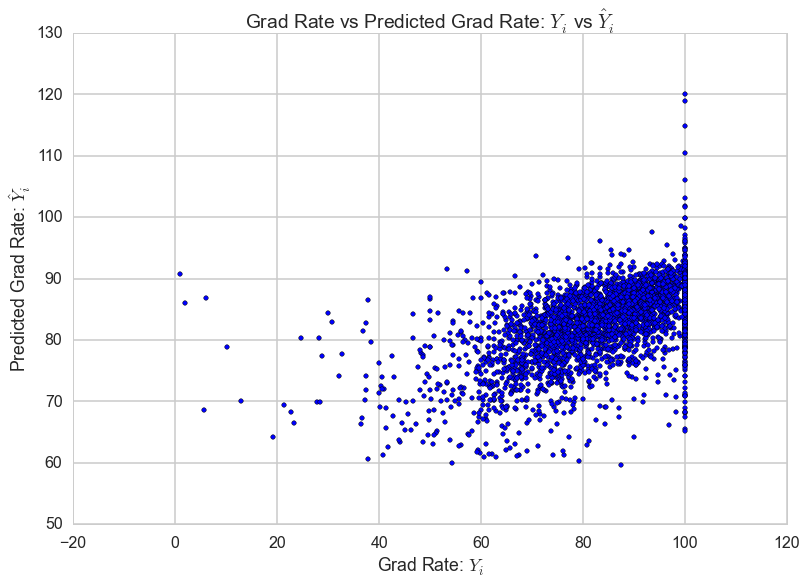

In [394]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Elastic Net Regression

In [395]:
elasticnet = linear_model.ElasticNet()
elasticnet.fit(Xtrain, ytrain)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [396]:
print elasticnet.coef_
print elasticnet.intercept_

[-0.13195744 -0.         -0.13873153 -0.         -0.          0.         -0.
  0.         -0.37837158 -0.28865486  0.         -0.          0.          0.
 -0.         -0.          0.         -0.05779109 -0.          0.         -0.
  0.33170636  0.          0.34685072 -0.         -0.58468841  0.85912212
 -0.          0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.         -0.          0.
 -0.0458063  -0.28653671 -1.63848414  0.          0.05870009 -0.52255668
  0.         -0.          0.18676267  0.          0.13970145 -0.
 -1.18757348  0.74381018 -0.         -0.          0.          0.          0.
  0.18056688  0.11772262  0.          0.16260372 -0.         -0.          1.1686988
  1.33548213 -0.          0.          0.          0.         -0.          0.
 -0.        

In [401]:
pd.DataFrame(zip(dftouse[lcols].columns, elasticnet.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=False)[:20]

,features,estimatedCoefficients
81,r_stud_reg_12_W_F,1.335482
80,r_stud_reg_12_W_M,1.168699
26,tlocrev_percent,0.859122
68,r_stud_re_W,0.743810
106,r_lrev_pt,0.502286
23,tcuresal_percent,0.346851
21,tcurinst_percent,0.331706
63,r_stud_re_F,0.186763
74,r_stud_reg_12_AAP_M,0.180567
109,r_lrev_it,0.165115


In [402]:
pd.DataFrame(zip(dftouse[lcols].columns, elasticnet.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=True)[:20]

,features,estimatedCoefficients
57,r_lunch_free,-1.638484
67,r_stud_re_B,-1.187573
25,tfedrev_percent,-0.584688
60,r_stud_18,-0.522557
8,tsrev_pp,-0.378372
142,r_frev_title1,-0.318963
122,r_lrev_molr,-0.300604
9,tfedrev_pp,-0.288655
56,r_IEP,-0.286537
107,r_lrev_gst,-0.180685


In [403]:
cross_validation.cross_val_score(elasticnet, Xtrain, ytrain, scoring='r2')

array([ 0.30001832,  0.31117907,  0.30552785])

In [404]:
yp = elasticnet.predict(Xtest)
mean_squared_error(yp, ytest)

125.21351541851051

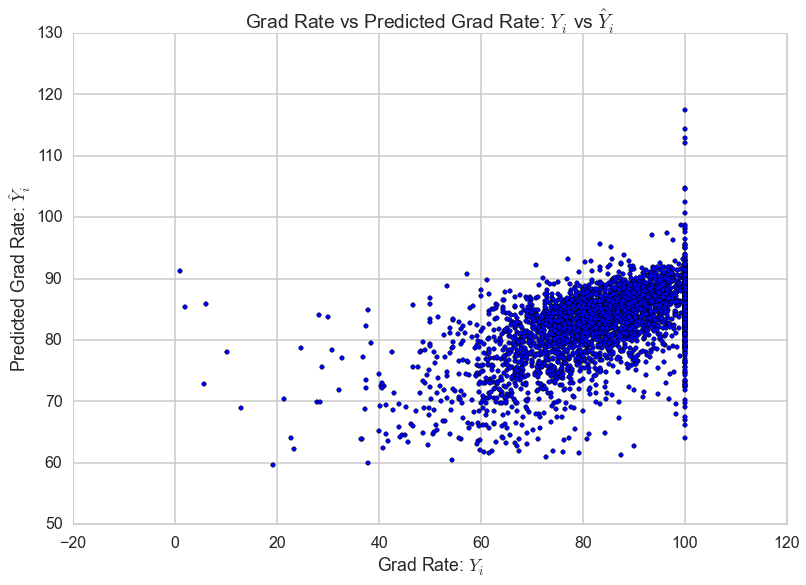

In [405]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

## Predicting graduation based on previous year graduation

In [406]:
dftouse.fillna(value=0,inplace=True)

In [407]:
dftouse = dftouse[dftouse['gradrate0607']>0]
print 'Has 0607 Grad Data: ' + str(len(dftouse))
dftouse = dftouse[dftouse['gradrate0708']>0]
print 'Has 0708 Grad Data: ' + str(len(dftouse))
dftouse = dftouse[dftouse['gradrate0809']>0]
print 'Has 0809 Grad Data: ' + str(len(dftouse))

Has 0607 Grad Data: 10467
Has 0708 Grad Data: 10221
Has 0809 Grad Data: 9745


In [408]:
dftouse.shape

(9745, 160)

In [409]:
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [410]:
#CITATION: From HW3
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [411]:
# make sure we didn't get unlucky in our mask selection
print "% Graduation in Training:", np.mean(dftouse['afgr'][mask])
print "% Graduation in Testing:", np.mean(dftouse['afgr'][~mask])

% Graduation in Training: 83.2747984167
% Graduation in Testing: 83.0458960328


In [412]:
Xmatrix=dftouse[['gradrate0607', 'gradrate0708', 'gradrate0809']].values
Yresp=dftouse['afgr'].values

In [413]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

##### Linear Regression - 0607, 0708, and 0809

In [414]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [415]:
print lm.intercept_
print lm.coef_

20.4936652066
[ 0.16019953  0.25538236  0.35124608]


In [416]:
pd.DataFrame(zip(dftouse[['gradrate0607', 'gradrate0708', 'gradrate0809']].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,gradrate0607,0.160200
1,gradrate0708,0.255382
2,gradrate0809,0.351246


In [417]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.50277506,  0.48507638,  0.51685603])

In [418]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

77.864712434278545

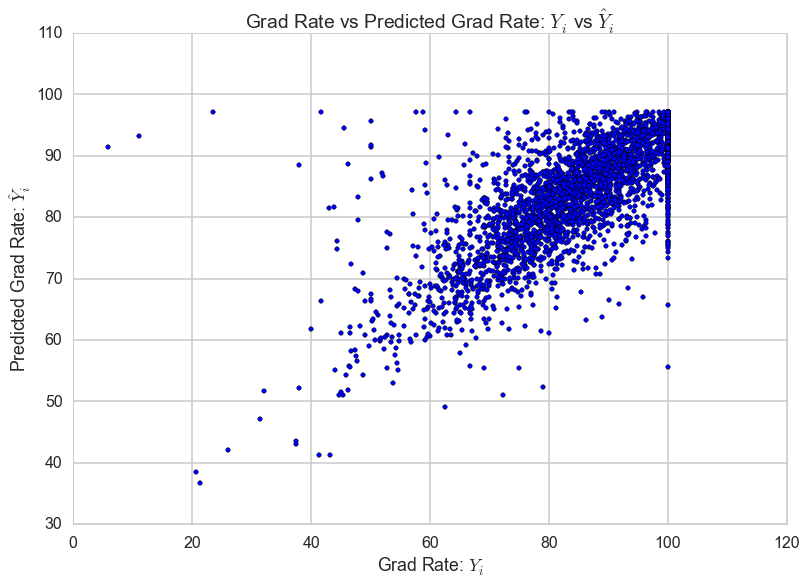

In [419]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Linear Regression - 0708 and 0809

In [455]:
Xmatrix=dftouse[['gradrate0708', 'gradrate0809']].values
Yresp=dftouse['afgr'].values

In [456]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

In [457]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [458]:
print lm.intercept_
print lm.coef_

22.7876656322
[ 0.33119563  0.4067367 ]


In [459]:
pd.DataFrame(zip(dftouse[['gradrate0708', 'gradrate0809']].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,gradrate0708,0.331196
1,gradrate0809,0.406737


In [460]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.48446568,  0.47364131,  0.50802541])

In [461]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

79.242329005605669

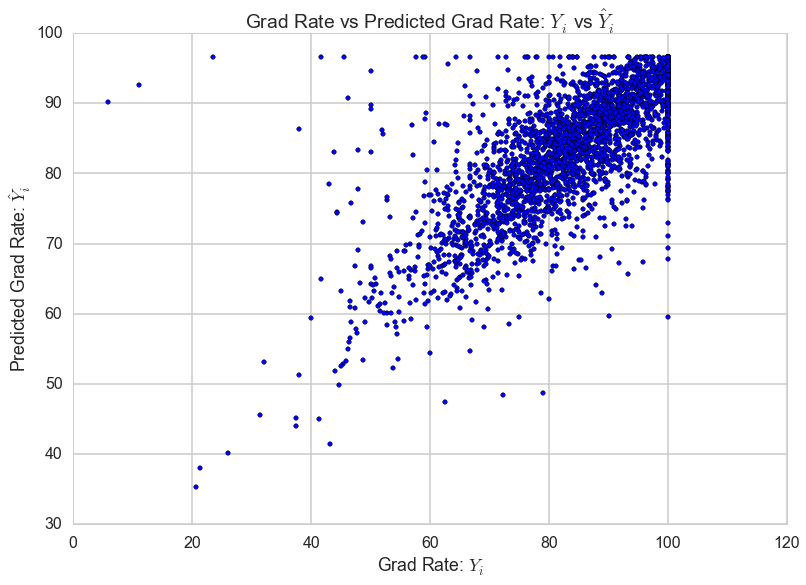

In [462]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Linear Regression - 0809 Only

In [429]:
Xmatrix=dftouse[['gradrate0809']].values
Yresp=dftouse['afgr'].values

In [432]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

In [433]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [434]:
print lm.intercept_
print lm.coef_

30.7343923128
[ 0.63948518]


In [435]:
pd.DataFrame(zip(dftouse[['gradrate0809']].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,gradrate0809,0.639485


In [436]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.41280288,  0.42315768,  0.43636067])

In [437]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

87.91408894697345

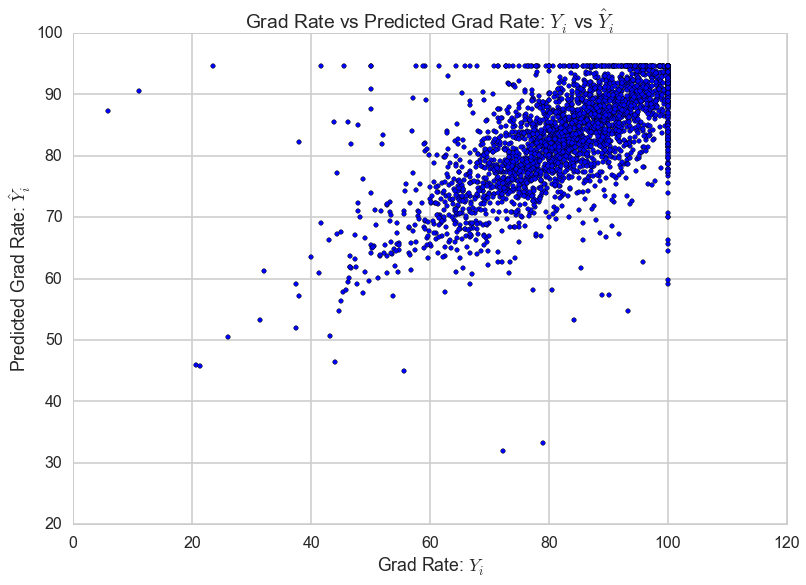

In [438]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Linear Regression - 0708 Only

In [439]:
Xmatrix=dftouse[['gradrate0708']].values
Yresp=dftouse['afgr'].values

In [440]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

In [441]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [442]:
print lm.intercept_
print lm.coef_

34.2120852665
[ 0.60028389]


In [443]:
pd.DataFrame(zip(dftouse[['gradrate0708']].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,gradrate0708,0.600284


In [444]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.39364439,  0.37207082,  0.4241629 ])

In [445]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

97.920885660902101

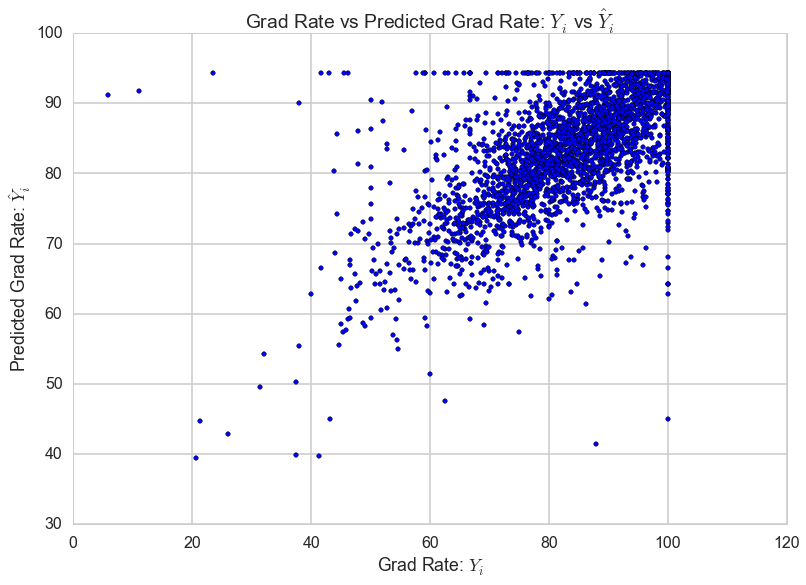

In [446]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Linear Regression - 0607 Only

In [447]:
Xmatrix=dftouse[['gradrate0607']].values
Yresp=dftouse['afgr'].values

In [448]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

In [449]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [450]:
print lm.intercept_
print lm.coef_

37.9318552228
[ 0.55664151]


In [451]:
pd.DataFrame(zip(dftouse[['gradrate0607']].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,gradrate0607,0.556642


In [452]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.36780599,  0.34047378,  0.33819325])

In [453]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

106.56462117727482

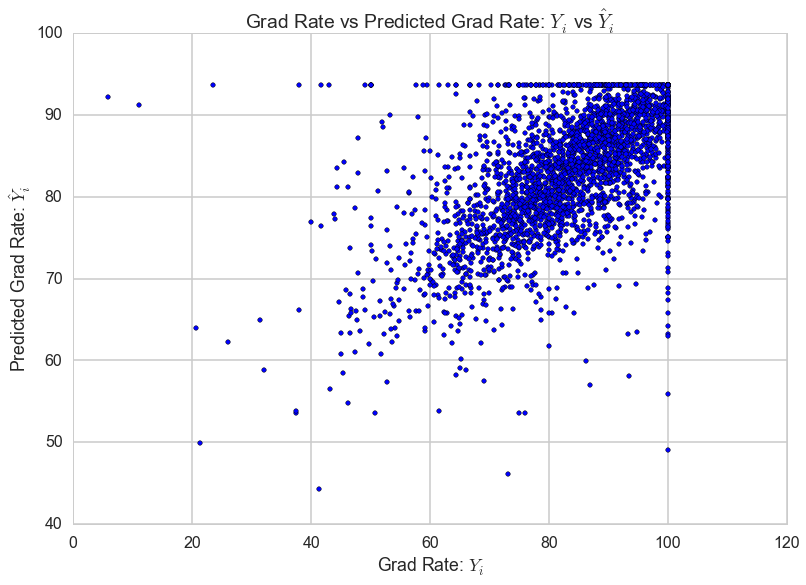

In [454]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

## Predicting graduation based on previous year graduation and all other factors

In [463]:
lcols=list(dftouse.columns)
lcols.remove('RESP_High_Graduation')
lcols.remove('RESP_Low_Graduation')
lcols.remove('afgr')

In [464]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['afgr'].values

In [465]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

##### Linear Regression

In [466]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [467]:
print lm.intercept_
print lm.coef_

25.8262756866
[  1.26159952e-01   3.80766525e-01  -1.30159079e+00   8.36403352e-01
   9.74862018e-01  -5.10495500e-01  -1.43040938e+01   1.02921894e+01
   7.57388869e+00   4.96863787e+00   8.64113533e-01   5.96469758e+00
  -1.95770430e-02   3.06615740e+00  -4.76072093e-01  -2.54048351e+00
   8.82371754e-01   2.53126180e-01  -7.98976544e+00   8.64113533e-01
  -4.21372386e-01   1.56095790e+01   4.06452619e+00  -9.87450728e-01
   1.05135143e+01  -1.62516491e+01  -4.10177253e+01  -3.64289258e+01
  -1.10958048e+01  -1.34545816e+01  -1.72152124e+01  -6.01957067e+00
   1.36338492e+01   1.82416238e+01   1.21258443e+01  -1.30315183e+00
  -8.71827665e-01  -3.93998701e-01   4.37905400e-01   6.29344147e-01
   8.04013160e-01   1.60491412e+00  -9.02928891e-02  -7.91860118e-01
   1.89532266e-01  -1.73463448e-01  -4.11144394e-02  -6.01957067e+00
   3.43792140e+00   2.58164928e+00   4.47023185e-02   4.72192280e-03
  -4.94242413e-02   7.87117350e-02   7.38862696e-01  -2.02945642e-01
   2.47884241e-02  -

In [468]:
pd.DataFrame(zip(dftouse[lcols].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,num_schools,0.126160
1,num_charter_schools,0.380767
2,num_pub_schools,-1.301591
3,num_students,0.836403
4,pupil_teacher_ratio_dist,0.974862
5,pupil_teacher_ratio_ps,-0.510496
6,totalrev_pp,-14.304094
7,tlocrev_pp,10.292189
8,tsrev_pp,7.573889
9,tfedrev_pp,4.968638


In [469]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.52353359,  0.28791722,  0.53294326])

In [470]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

78.549631109508738

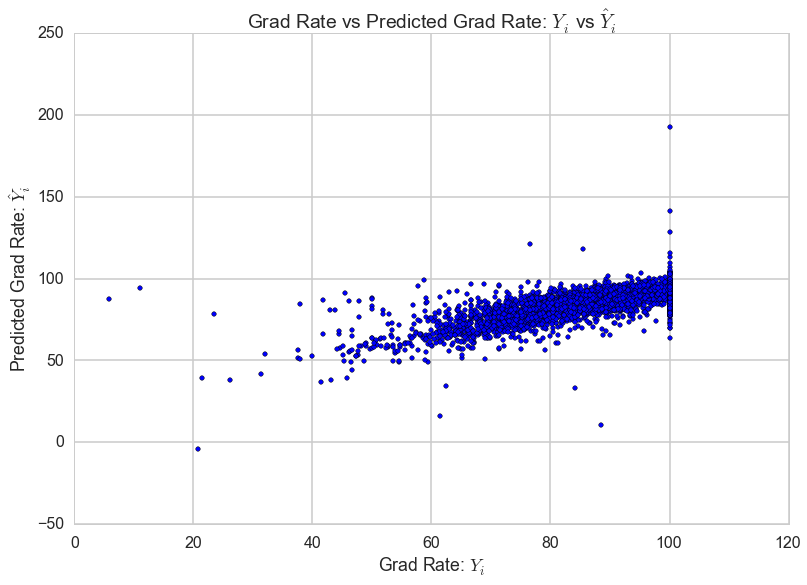

In [471]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Lasso Regression

In [472]:
lasso = linear_model.Lasso()

In [473]:
lasso.fit(Xtrain, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [474]:
pd.DataFrame(zip(dftouse[lcols].columns, lasso.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=False)[:10]

,features,estimatedCoefficients
81,r_stud_reg_12_W_F,0.345621
156,gradrate0809,0.343951
155,gradrate0708,0.249311
154,gradrate0607,0.153719
108,r_lrev_put,0.000000
101,r_st_LEASS,-0.000000
102,r_st_SA,-0.000000
103,r_st_SASS,-0.000000
104,r_st_SSSS,-0.000000
105,r_st_OSSS,-0.000000


In [475]:
pd.DataFrame(zip(dftouse[lcols].columns, lasso.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=True)[:10]

,features,estimatedCoefficients
57,r_lunch_free,-0.011909
100,r_st_LEA,-0.000000
101,r_st_LEASS,-0.000000
102,r_st_SA,-0.000000
103,r_st_SASS,-0.000000
104,r_st_SSSS,-0.000000
105,r_st_OSSS,-0.000000
106,r_lrev_pt,0.000000
107,r_lrev_gst,-0.000000
108,r_lrev_put,0.000000


In [476]:
cross_validation.cross_val_score(lasso, Xtrain, ytrain, scoring='r2')

array([ 0.50827446,  0.48904759,  0.52182355])

In [477]:
yp = lasso.predict(Xtest)
mean_squared_error(yp, ytest)

76.987899329377626

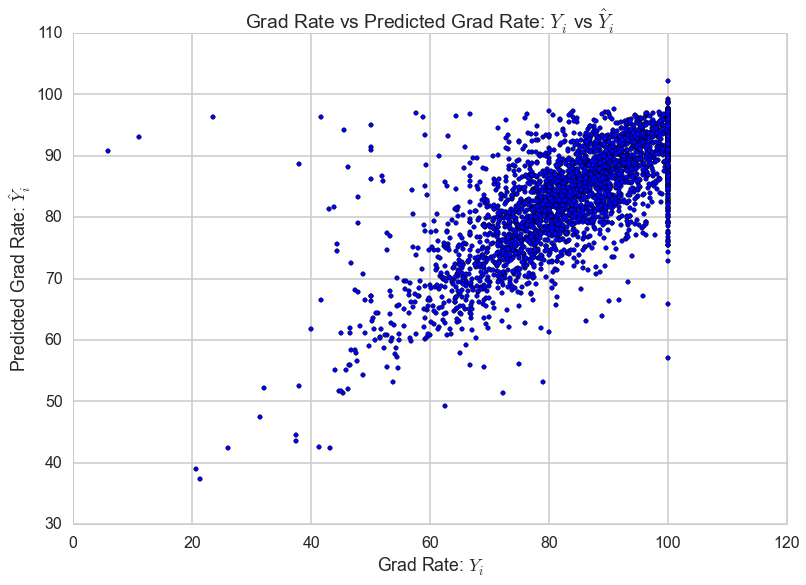

In [478]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

##### Elastic Net Regression

In [479]:
elasticnet = linear_model.ElasticNet()
elasticnet.fit(Xtrain, ytrain)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [480]:
print elasticnet.coef_
print elasticnet.intercept_

[-0.          0.         -0.         -0.          0.          0.          0.
  0.01214214 -0.         -0.          0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.         -0.         -0.09148188  0.15953202
 -0.          0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.          0.
 -0.         -0.         -0.28210073  0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.         -0.20763781
  0.         -0.          0.          0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.          0.24048724
  0.43241754 -0.          0.          0.          0.          0.         -0.
 -0.       

In [487]:
pd.DataFrame(zip(dftouse[lcols].columns, elasticnet.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=False)[:10]

,features,estimatedCoefficients
81,r_stud_reg_12_W_F,0.432418
156,gradrate0809,0.329163
80,r_stud_reg_12_W_M,0.240487
155,gradrate0708,0.237549
26,tlocrev_percent,0.159532
154,gradrate0607,0.141898
96,r_st_OGC,0.046566
7,tlocrev_pp,0.012142
106,r_lrev_pt,0.000000
101,r_st_LEASS,-0.000000


In [486]:
pd.DataFrame(zip(dftouse[lcols].columns, elasticnet.coef_), columns = ['features', 'estimatedCoefficients']).sort(['estimatedCoefficients'], ascending=True)[:10]

,features,estimatedCoefficients
57,r_lunch_free,-0.282101
67,r_stud_re_B,-0.207638
124,r_lrev_rr,-0.124435
132,r_srev_cbsp,-0.105108
25,tfedrev_percent,-0.091482
0,num_schools,-0.000000
101,r_st_LEASS,-0.000000
102,r_st_SA,-0.000000
103,r_st_SASS,-0.000000
104,r_st_SSSS,-0.000000


In [483]:
cross_validation.cross_val_score(elasticnet, Xtrain, ytrain, scoring='r2')

array([ 0.51945737,  0.50036247,  0.52981185])

In [484]:
yp = elasticnet.predict(Xtest)
mean_squared_error(yp, ytest)

75.202296857481912

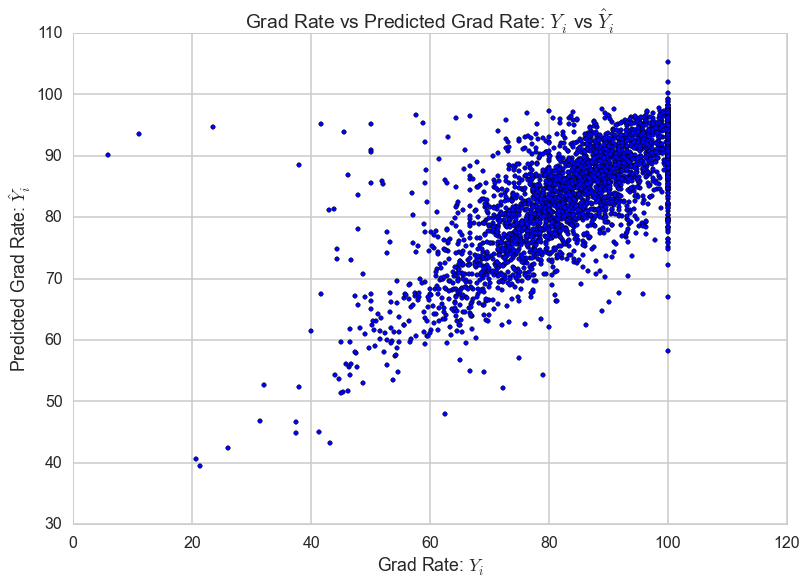

In [485]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

Try to create a model that beats this.

In [550]:
lcols=['r_stud_reg_12_W_F', 'r_stud_reg_12_W_M', 'tlocrev_percent', 'r_stud_re_W', 'r_lrev_pt', 'r_lunch_free', 'r_stud_re_B', 'tfedrev_percent', 'r_stud_18', 'tsrev_pp', 'tcuresal_percent', 'r_frev_title1', 'tcurinst_percent', 'r_lrev_molr']

In [551]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['afgr'].values

In [552]:
Xtrain=Xmatrix[mask]
Xtest=Xmatrix[~mask]
ytrain=Yresp[mask]
ytest=Yresp[~mask]

In [553]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [554]:
print lm.intercept_
print lm.coef_

82.9919940332
[ 1.35163458  1.49106026  0.76786942  0.2403265   0.65999636 -2.67685306
 -1.86604007 -1.11057857 -1.61474825 -0.56749634  0.86827285 -0.592755
  0.03905916 -0.52307567]


In [555]:
pd.DataFrame(zip(dftouse[lcols].columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,r_stud_reg_12_W_F,1.351635
1,r_stud_reg_12_W_M,1.491060
2,tlocrev_percent,0.767869
3,r_stud_re_W,0.240326
4,r_lrev_pt,0.659996
5,r_lunch_free,-2.676853
6,r_stud_re_B,-1.866040
7,tfedrev_percent,-1.110579
8,r_stud_18,-1.614748
9,tsrev_pp,-0.567496


In [556]:
cross_validation.cross_val_score(lm, Xtrain, ytrain, scoring='r2')

array([ 0.31090521,  0.3360768 ,  0.33374125])

In [557]:
yp = lm.predict(Xtest)
mean_squared_error(yp, ytest)

103.55177295356501

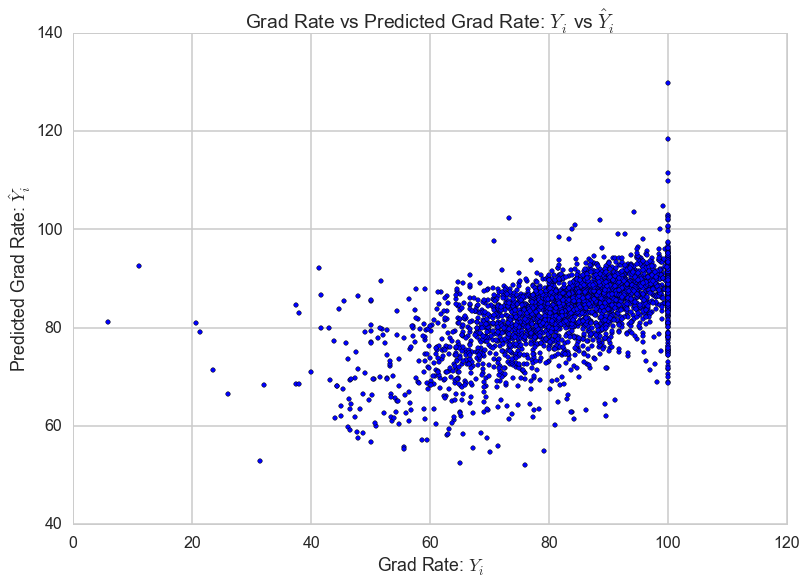

In [558]:
plt.scatter(ytest, yp)
plt.xlabel("Grad Rate: $Y_i$")
plt.ylabel("Predicted Grad Rate: $\hat{Y}_i$")
plt.title("Grad Rate vs Predicted Grad Rate: $Y_i$ vs $\hat{Y}_i$")

### Findings

Linear Regression - 0607 Only and Best Model have very similar MSE.  The 0607 Only model overpredicts.  The Best Model underpredicts.  Underprediction is better than overprediction in this scenario - it is disadvantageous if the school district thinks it is performing better than it is.

This brings to mind an interesting scenario.  We started this project with 09-10 graduation data because it was the newest data available.  Given the similarity in the 0607 Only and Best model, if all we have is school district information, it may be worthwhile checking if we can predict with the same quality as the 0607 Only model.  If quality is similar, we might be able to predict 12-13 graduation rates several years before they are released to the public.

We go back to ELSI to download 0607 school district information to test this out.